In [1]:
import numpy as np
from time import time
import pickle
import gc

In [2]:
f = open('test.bin', 'rb')
mat = pickle.load(f)

In [3]:
mat = mat[1:-1]

In [4]:
for i in range(len(mat)):
    mat[i].pop()
    mat[i].pop(0)
    

In [5]:
np.array(mat).shape

(98, 98)

In [6]:
k = np.array(mat)

In [7]:
for i in range(len(mat)):
    for j in range(len(mat)):
        if k[i][j] == 2:
            start = (i, j)
        if k[i][j] == 3:
            goal = (i, j)
            
k[start] = 0
k[goal] = 0

In [8]:
obj = k.copy()

In [9]:
def pi(a):
    for i in range(len(a)):
        if a[i] == np.nan:
            a[i] = 0
            
    s = np.nansum(a)
    if s == 0:
        s = 1e-5
#         print('here')
    for i in range(len(a)):
        a[i] /= s
    return a

def get_pi(a):
    for i in range(len(a)):
        for j in range(len(a[0])):
            a[i][j] = pi(a[i][j])
    return a

In [10]:
def action(s):
    # eps는 사전 설정
    ## s_next 생성
    if np.random.rand() > eps:
        return np.argmax(v[s])
    else:
        return np.random.choice([0, 1, 2, 3]) # 상하좌우
    
def state_map(s, a):
    s = list(s)
    if a == 0:
        s[0] -= 1
    elif a == 1:
        s[0] += 1
    elif a == 2:
        s[1] -= 1
    else:
        s[1] += 1
    return tuple(s)


In [87]:
def update(s, a, r, s_next, v):
    # lr, gamma 는 위에서 설정하기
    if s_next == goal:
        v[s][a] = v[s][a] + lr * (r - v[s][a])
    else:
        v[s][a] = v[s][a] + lr * (r + gamma*np.max(v[s_next]) - v[s][a])
        
#     v[s] = pi(v[s])
    return v


In [11]:
def update(s, a, r, s_next, v): # SRASA
    # lr, gamma 는 위에서 설정하기
    if s_next == goal:
        v[s][a] = v[s][a] + lr * (r - v[s][a])
    else:
        a_next = action(s_next)
        v[s][a] = v[s][a] + lr * (r + gamma*v[s_next][a_next] - v[s][a])
        
#     v[s] = pi(v[s])
    return v


In [12]:
def is_wall(s):
    a = shape[0] - 1
    b = shape[1] -1
    if s[0] < 0 or s[0] > a:
        return True
    elif s[1] < 0 or s[1] > b:
        return True
    elif obj[s] == 1:
        return True
    else:
        return False

In [13]:
def play(s):
    global v, fail_hist, hist, eps
    temp_hist = []
    while 1:
        eps *= np.exp(-0.001)
        temp_hist.append(s)
        a = action(s)
        s_next = state_map(s, a)
        
        if is_wall(s_next):
            fail_hist.append((s, s_next))
            v[s][a] = 0
#             v[s] = pi(v[s])
#             v[s] /= np.sum(v[s])
            s_next = s
            
            
        elif s_next[0] == goal[0] and s_next[1] == goal[1]: ## 도착
            r = 1
            v = update(s, a, r, s_next, v)
            break
        else: ## 갈곳이 남음
            r = 0
            v = update(s, a, r , s_next, v)
#             v[s] /= np.sum(v[s])
            
        fake_obj[s_next] = 2
#         print(fake_obj)
        fake_obj[s_next] = obj[s_next]
#         print(eps)
            
        s = s_next
        
    hist.append(temp_hist)

In [14]:
shape = obj.shape
value = mat.copy()

for i in range(shape[0]):
    for j in range(shape[1]):
        value[i][j] = [0.25, 0.25, 0.25, 0.25] # 위, 아래, 좌, 우
v = np.array(value)
gc.collect()

0

In [15]:
obj

array([[0, 1, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 0, 1],
       ...,
       [0, 1, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [16]:
%%time
lr = 0.1
eps = 0.9
gamma = 0.95
v = np.array(value)
fail_hist = []
hist = []
fake_obj = obj.copy()
k = float('inf')
c = 0

s_0 = start
goal = goal

# start = time()
i = 0
while 1:
    i += 1
    play(s_0)
    new_k = len(hist[-1])
    if new_k <= k and new_k != float('inf'):
        c += 1
        k = new_k
        if c == 20:
            break
    else:
        k = float('inf')
        c = 0
        
    
    eps = (0.8 ** (i//10+1))
    print(eps)

# lt = time() - start

0.8
0.8
0.8
0.8
0.8
0.8
0.8
0.8
0.8
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.6400000000000001
0.5120000000000001
0.5120000000000001
0.5120000000000001
0.5120000000000001
0.5120000000000001
0.5120000000000001
0.5120000000000001
0.5120000000000001
0.5120000000000001
0.5120000000000001
0.4096000000000001
0.4096000000000001
0.4096000000000001
0.4096000000000001
0.4096000000000001
0.4096000000000001
0.4096000000000001
0.4096000000000001
0.4096000000000001
0.4096000000000001
0.3276800000000001
0.3276800000000001
0.3276800000000001
0.3276800000000001
0.3276800000000001
0.3276800000000001
0.3276800000000001
0.3276800000000001
0.3276800000000001
0.3276800000000001
0.2621440000000001
0.2621440000000001
0.2621440000000001
0.2621440000000001
0.2621440000000001
0.2621440000000001
0.2621440000000001
0.2621440000000001
0.2621440000000001
0.2621440000000001
0.209715200000

0.00013292279957849188
0.00013292279957849188
0.00010633823966279351
0.00010633823966279351
0.00010633823966279351
0.00010633823966279351
0.00010633823966279351
0.00010633823966279351
0.00010633823966279351
0.00010633823966279351
0.00010633823966279351
0.00010633823966279351
8.507059173023481e-05
8.507059173023481e-05
8.507059173023481e-05
8.507059173023481e-05
8.507059173023481e-05
8.507059173023481e-05
8.507059173023481e-05
8.507059173023481e-05
8.507059173023481e-05
8.507059173023481e-05
6.805647338418786e-05
6.805647338418786e-05
6.805647338418786e-05
6.805647338418786e-05
6.805647338418786e-05
6.805647338418786e-05
6.805647338418786e-05
6.805647338418786e-05
6.805647338418786e-05
6.805647338418786e-05
5.444517870735029e-05
5.444517870735029e-05
5.444517870735029e-05
5.444517870735029e-05
5.444517870735029e-05
5.444517870735029e-05
5.444517870735029e-05
5.444517870735029e-05
5.444517870735029e-05
5.444517870735029e-05
4.355614296588023e-05
4.355614296588023e-05
4.355614296588023e-0

3.450873173395297e-08
3.450873173395297e-08
3.450873173395297e-08
3.450873173395297e-08
2.7606985387162374e-08
2.7606985387162374e-08
2.7606985387162374e-08
2.7606985387162374e-08
2.7606985387162374e-08
2.7606985387162374e-08
2.7606985387162374e-08
2.7606985387162374e-08
2.7606985387162374e-08
2.7606985387162374e-08
2.20855883097299e-08
2.20855883097299e-08
2.20855883097299e-08
2.20855883097299e-08
2.20855883097299e-08
2.20855883097299e-08
2.20855883097299e-08
2.20855883097299e-08
2.20855883097299e-08
2.20855883097299e-08
1.7668470647783922e-08
1.7668470647783922e-08
1.7668470647783922e-08
1.7668470647783922e-08
1.7668470647783922e-08
1.7668470647783922e-08
1.7668470647783922e-08
1.7668470647783922e-08
1.7668470647783922e-08
1.7668470647783922e-08
1.4134776518227139e-08
1.4134776518227139e-08
1.4134776518227139e-08
1.4134776518227139e-08
1.4134776518227139e-08
1.4134776518227139e-08
1.4134776518227139e-08
1.4134776518227139e-08
1.4134776518227139e-08
1.4134776518227139e-08
1.1307821214

8.958978968711274e-12
8.958978968711274e-12
8.958978968711274e-12
8.958978968711274e-12
8.958978968711274e-12
8.958978968711274e-12
8.958978968711274e-12
8.958978968711274e-12
7.167183174969019e-12
7.167183174969019e-12
7.167183174969019e-12
7.167183174969019e-12
7.167183174969019e-12
7.167183174969019e-12
7.167183174969019e-12
7.167183174969019e-12
7.167183174969019e-12
7.167183174969019e-12
5.733746539975216e-12
5.733746539975216e-12
5.733746539975216e-12
5.733746539975216e-12
5.733746539975216e-12
5.733746539975216e-12
5.733746539975216e-12
5.733746539975216e-12
5.733746539975216e-12
5.733746539975216e-12
4.586997231980173e-12
4.586997231980173e-12
4.586997231980173e-12
4.586997231980173e-12
4.586997231980173e-12
4.586997231980173e-12
4.586997231980173e-12
4.586997231980173e-12
4.586997231980173e-12
4.586997231980173e-12
3.669597785584139e-12
3.669597785584139e-12
3.669597785584139e-12
3.669597785584139e-12
3.669597785584139e-12
3.669597785584139e-12
3.669597785584139e-12
3.66959778

2.3258839177459616e-15
2.3258839177459616e-15
2.3258839177459616e-15
2.3258839177459616e-15
2.3258839177459616e-15
2.3258839177459616e-15
2.3258839177459616e-15
2.3258839177459616e-15
1.860707134196769e-15
1.860707134196769e-15
1.860707134196769e-15
1.860707134196769e-15
1.860707134196769e-15
1.860707134196769e-15
1.860707134196769e-15
1.860707134196769e-15
1.860707134196769e-15
1.860707134196769e-15
1.4885657073574156e-15
1.4885657073574156e-15
1.4885657073574156e-15
1.4885657073574156e-15
1.4885657073574156e-15
1.4885657073574156e-15
1.4885657073574156e-15
1.4885657073574156e-15
1.4885657073574156e-15
1.4885657073574156e-15
1.1908525658859326e-15
1.1908525658859326e-15
1.1908525658859326e-15
1.1908525658859326e-15
1.1908525658859326e-15
1.1908525658859326e-15
1.1908525658859326e-15
1.1908525658859326e-15
1.1908525658859326e-15
1.1908525658859326e-15
9.52682052708746e-16
9.52682052708746e-16
9.52682052708746e-16
9.52682052708746e-16
9.52682052708746e-16
9.52682052708746e-16
9.52682052

6.038339879714529e-19
6.038339879714529e-19
6.038339879714529e-19
6.038339879714529e-19
6.038339879714529e-19
6.038339879714529e-19
6.038339879714529e-19
6.038339879714529e-19
6.038339879714529e-19
6.038339879714529e-19
4.830671903771623e-19
4.830671903771623e-19
4.830671903771623e-19
4.830671903771623e-19
4.830671903771623e-19
4.830671903771623e-19
4.830671903771623e-19
4.830671903771623e-19
4.830671903771623e-19
4.830671903771623e-19
3.8645375230172993e-19
3.8645375230172993e-19
3.8645375230172993e-19
3.8645375230172993e-19
3.8645375230172993e-19
3.8645375230172993e-19
3.8645375230172993e-19
3.8645375230172993e-19
3.8645375230172993e-19
3.8645375230172993e-19
3.0916300184138395e-19
3.0916300184138395e-19
3.0916300184138395e-19
3.0916300184138395e-19
3.0916300184138395e-19
3.0916300184138395e-19
3.0916300184138395e-19
3.0916300184138395e-19
3.0916300184138395e-19
3.0916300184138395e-19
2.4733040147310716e-19
2.4733040147310716e-19
2.4733040147310716e-19
2.4733040147310716e-19
2.473304

1.9595533242629612e-22
1.9595533242629612e-22
1.9595533242629612e-22
1.9595533242629612e-22
1.5676426594103693e-22
1.5676426594103693e-22
1.5676426594103693e-22
1.5676426594103693e-22
1.5676426594103693e-22
1.5676426594103693e-22
1.5676426594103693e-22
1.5676426594103693e-22
1.5676426594103693e-22
1.5676426594103693e-22
1.2541141275282953e-22
1.2541141275282953e-22
1.2541141275282953e-22
1.2541141275282953e-22
1.2541141275282953e-22
1.2541141275282953e-22
1.2541141275282953e-22
1.2541141275282953e-22
1.2541141275282953e-22
1.2541141275282953e-22
1.0032913020226364e-22
1.0032913020226364e-22
1.0032913020226364e-22
1.0032913020226364e-22
1.0032913020226364e-22
1.0032913020226364e-22
1.0032913020226364e-22
1.0032913020226364e-22
1.0032913020226364e-22
1.0032913020226364e-22
8.026330416181091e-23
8.026330416181091e-23
8.026330416181091e-23
8.026330416181091e-23
8.026330416181091e-23
8.026330416181091e-23
8.026330416181091e-23
8.026330416181091e-23
8.026330416181091e-23
8.026330416181091e-2

5.087291284851037e-26
5.087291284851037e-26
5.087291284851037e-26
5.087291284851037e-26
5.087291284851037e-26
5.087291284851037e-26
5.087291284851037e-26
5.087291284851037e-26
5.087291284851037e-26
5.087291284851037e-26
4.0698330278808296e-26
4.0698330278808296e-26
4.0698330278808296e-26
4.0698330278808296e-26
4.0698330278808296e-26
4.0698330278808296e-26
4.0698330278808296e-26
4.0698330278808296e-26
4.0698330278808296e-26
4.0698330278808296e-26
3.255866422304664e-26
3.255866422304664e-26
3.255866422304664e-26
3.255866422304664e-26
3.255866422304664e-26
3.255866422304664e-26
3.255866422304664e-26
3.255866422304664e-26
3.255866422304664e-26
3.255866422304664e-26
2.604693137843731e-26
2.604693137843731e-26
2.604693137843731e-26
2.604693137843731e-26
2.604693137843731e-26
2.604693137843731e-26
2.604693137843731e-26
2.604693137843731e-26
2.604693137843731e-26
2.604693137843731e-26
2.083754510274985e-26
2.083754510274985e-26
2.083754510274985e-26
2.083754510274985e-26
2.083754510274985e-26


1.6509204097989811e-29
1.6509204097989811e-29
1.6509204097989811e-29
1.320736327839185e-29
1.320736327839185e-29
1.320736327839185e-29
1.320736327839185e-29
1.320736327839185e-29
1.320736327839185e-29
1.320736327839185e-29
1.320736327839185e-29
1.320736327839185e-29
1.320736327839185e-29
1.056589062271348e-29
1.056589062271348e-29
1.056589062271348e-29
1.056589062271348e-29
1.056589062271348e-29
1.056589062271348e-29
1.056589062271348e-29
1.056589062271348e-29
1.056589062271348e-29
1.056589062271348e-29
8.452712498170784e-30
8.452712498170784e-30
8.452712498170784e-30
8.452712498170784e-30
8.452712498170784e-30
8.452712498170784e-30
8.452712498170784e-30
8.452712498170784e-30
8.452712498170784e-30
8.452712498170784e-30
6.762169998536628e-30
6.762169998536628e-30
6.762169998536628e-30
6.762169998536628e-30
6.762169998536628e-30
6.762169998536628e-30
6.762169998536628e-30
6.762169998536628e-30
6.762169998536628e-30
6.762169998536628e-30
5.409735998829303e-30
5.409735998829303e-30
5.40973

4.286034428745149e-33
4.286034428745149e-33
4.286034428745149e-33
3.428827542996119e-33
3.428827542996119e-33
3.428827542996119e-33
3.428827542996119e-33
3.428827542996119e-33
3.428827542996119e-33
3.428827542996119e-33
3.428827542996119e-33
3.428827542996119e-33
3.428827542996119e-33
2.7430620343968956e-33
2.7430620343968956e-33
2.7430620343968956e-33
2.7430620343968956e-33
2.7430620343968956e-33
2.7430620343968956e-33
2.7430620343968956e-33
2.7430620343968956e-33
2.7430620343968956e-33
2.7430620343968956e-33
2.1944496275175166e-33
2.1944496275175166e-33
2.1944496275175166e-33
2.1944496275175166e-33
2.1944496275175166e-33
2.1944496275175166e-33
2.1944496275175166e-33
2.1944496275175166e-33
2.1944496275175166e-33
2.1944496275175166e-33
1.7555597020140133e-33
1.7555597020140133e-33
1.7555597020140133e-33
1.7555597020140133e-33
1.7555597020140133e-33
1.7555597020140133e-33
1.7555597020140133e-33
1.7555597020140133e-33
1.7555597020140133e-33
1.7555597020140133e-33
1.4044477616112107e-33
1

1.1127181549972799e-36
1.1127181549972799e-36
1.1127181549972799e-36
1.1127181549972799e-36
8.901745239978238e-37
8.901745239978238e-37
8.901745239978238e-37
8.901745239978238e-37
8.901745239978238e-37
8.901745239978238e-37
8.901745239978238e-37
8.901745239978238e-37
8.901745239978238e-37
8.901745239978238e-37
7.121396191982591e-37
7.121396191982591e-37
7.121396191982591e-37
7.121396191982591e-37
7.121396191982591e-37
7.121396191982591e-37
7.121396191982591e-37
7.121396191982591e-37
7.121396191982591e-37
7.121396191982591e-37
5.697116953586073e-37
5.697116953586073e-37
5.697116953586073e-37
5.697116953586073e-37
5.697116953586073e-37
5.697116953586073e-37
5.697116953586073e-37
5.697116953586073e-37
5.697116953586073e-37
5.697116953586073e-37
4.557693562868859e-37
4.557693562868859e-37
4.557693562868859e-37
4.557693562868859e-37
4.557693562868859e-37
4.557693562868859e-37
4.557693562868859e-37
4.557693562868859e-37
4.557693562868859e-37
4.557693562868859e-37
3.6461548502950876e-37
3.646

2.8887814903135285e-40
2.8887814903135285e-40
2.8887814903135285e-40
2.311025192250823e-40
2.311025192250823e-40
2.311025192250823e-40
2.311025192250823e-40
2.311025192250823e-40
2.311025192250823e-40
2.311025192250823e-40
2.311025192250823e-40
2.311025192250823e-40
2.311025192250823e-40
1.8488201538006587e-40
1.8488201538006587e-40
1.8488201538006587e-40
1.8488201538006587e-40
1.8488201538006587e-40
1.8488201538006587e-40
1.8488201538006587e-40
1.8488201538006587e-40
1.8488201538006587e-40
1.8488201538006587e-40
1.4790561230405269e-40
1.4790561230405269e-40
1.4790561230405269e-40
1.4790561230405269e-40
1.4790561230405269e-40
1.4790561230405269e-40
1.4790561230405269e-40
1.4790561230405269e-40
1.4790561230405269e-40
1.4790561230405269e-40
1.1832448984324215e-40
1.1832448984324215e-40
1.1832448984324215e-40
1.1832448984324215e-40
1.1832448984324215e-40
1.1832448984324215e-40
1.1832448984324215e-40
1.1832448984324215e-40
1.1832448984324215e-40
1.1832448984324215e-40
9.465959187459373e-41

7.499705528574262e-44
7.499705528574262e-44
5.99976442285941e-44
5.99976442285941e-44
5.99976442285941e-44
5.99976442285941e-44
5.99976442285941e-44
5.99976442285941e-44
5.99976442285941e-44
5.99976442285941e-44
5.99976442285941e-44
5.99976442285941e-44
4.799811538287528e-44
4.799811538287528e-44
4.799811538287528e-44
4.799811538287528e-44
4.799811538287528e-44
4.799811538287528e-44
4.799811538287528e-44
4.799811538287528e-44
4.799811538287528e-44
4.799811538287528e-44
3.8398492306300225e-44
3.8398492306300225e-44
3.8398492306300225e-44
3.8398492306300225e-44
3.8398492306300225e-44
3.8398492306300225e-44
3.8398492306300225e-44
3.8398492306300225e-44
3.8398492306300225e-44
3.8398492306300225e-44
3.071879384504018e-44
3.071879384504018e-44
3.071879384504018e-44
3.071879384504018e-44
3.071879384504018e-44
3.071879384504018e-44
3.071879384504018e-44
3.071879384504018e-44
3.071879384504018e-44
3.071879384504018e-44
2.4575035076032147e-44
2.4575035076032147e-44
2.4575035076032147e-44
2.45750

1.9470348727976249e-47
1.9470348727976249e-47
1.5576278982381e-47
1.5576278982381e-47
1.5576278982381e-47
1.5576278982381e-47
1.5576278982381e-47
1.5576278982381e-47
1.5576278982381e-47
1.5576278982381e-47
1.5576278982381e-47
1.5576278982381e-47
1.24610231859048e-47
1.24610231859048e-47
1.24610231859048e-47
1.24610231859048e-47
1.24610231859048e-47
1.24610231859048e-47
1.24610231859048e-47
1.24610231859048e-47
1.24610231859048e-47
1.24610231859048e-47
9.968818548723841e-48
9.968818548723841e-48
9.968818548723841e-48
9.968818548723841e-48
9.968818548723841e-48
9.968818548723841e-48
9.968818548723841e-48
9.968818548723841e-48
9.968818548723841e-48
9.968818548723841e-48
7.975054838979073e-48
7.975054838979073e-48
7.975054838979073e-48
7.975054838979073e-48
7.975054838979073e-48
7.975054838979073e-48
7.975054838979073e-48
7.975054838979073e-48
7.975054838979073e-48
7.975054838979073e-48
6.380043871183259e-48
6.380043871183259e-48
6.380043871183259e-48
6.380043871183259e-48
6.38004387118325

4.0438332213939544e-51
4.0438332213939544e-51
4.0438332213939544e-51
4.0438332213939544e-51
4.0438332213939544e-51
4.0438332213939544e-51
4.0438332213939544e-51
4.0438332213939544e-51
4.0438332213939544e-51
3.2350665771151636e-51
3.2350665771151636e-51
3.2350665771151636e-51
3.2350665771151636e-51
3.2350665771151636e-51
3.2350665771151636e-51
3.2350665771151636e-51
3.2350665771151636e-51
3.2350665771151636e-51
3.2350665771151636e-51
2.588053261692131e-51
2.588053261692131e-51
2.588053261692131e-51
2.588053261692131e-51
2.588053261692131e-51
2.588053261692131e-51
2.588053261692131e-51
2.588053261692131e-51
2.588053261692131e-51
2.588053261692131e-51
2.070442609353705e-51
2.070442609353705e-51
2.070442609353705e-51
2.070442609353705e-51
2.070442609353705e-51
2.070442609353705e-51
2.070442609353705e-51
2.070442609353705e-51
2.070442609353705e-51
2.070442609353705e-51
1.6563540874829642e-51
1.6563540874829642e-51
1.6563540874829642e-51
1.6563540874829642e-51
1.6563540874829642e-51
1.656354

1.3122989082426652e-54
1.0498391265941323e-54
1.0498391265941323e-54
1.0498391265941323e-54
1.0498391265941323e-54
1.0498391265941323e-54
1.0498391265941323e-54
1.0498391265941323e-54
1.0498391265941323e-54
1.0498391265941323e-54
1.0498391265941323e-54
8.398713012753058e-55
8.398713012753058e-55
8.398713012753058e-55
8.398713012753058e-55
8.398713012753058e-55
8.398713012753058e-55
8.398713012753058e-55
8.398713012753058e-55
8.398713012753058e-55
8.398713012753058e-55
6.718970410202448e-55
6.718970410202448e-55
6.718970410202448e-55
6.718970410202448e-55
6.718970410202448e-55
6.718970410202448e-55
6.718970410202448e-55
6.718970410202448e-55
6.718970410202448e-55
6.718970410202448e-55
5.375176328161958e-55
5.375176328161958e-55
5.375176328161958e-55
5.375176328161958e-55
5.375176328161958e-55
5.375176328161958e-55
5.375176328161958e-55
5.375176328161958e-55
5.375176328161958e-55
5.375176328161958e-55
4.300141062529567e-55
4.300141062529567e-55
4.300141062529567e-55
4.300141062529567e-55

3.406922749363544e-58
3.406922749363544e-58
2.7255381994908357e-58
2.7255381994908357e-58
2.7255381994908357e-58
2.7255381994908357e-58
2.7255381994908357e-58
2.7255381994908357e-58
2.7255381994908357e-58
2.7255381994908357e-58
2.7255381994908357e-58
2.7255381994908357e-58
2.1804305595926688e-58
2.1804305595926688e-58
2.1804305595926688e-58
2.1804305595926688e-58
2.1804305595926688e-58
2.1804305595926688e-58
2.1804305595926688e-58
2.1804305595926688e-58
2.1804305595926688e-58
2.1804305595926688e-58
1.744344447674135e-58
1.744344447674135e-58
1.744344447674135e-58
1.744344447674135e-58
1.744344447674135e-58
1.744344447674135e-58
1.744344447674135e-58
1.744344447674135e-58
1.744344447674135e-58
1.744344447674135e-58
1.395475558139308e-58
1.395475558139308e-58
1.395475558139308e-58
1.395475558139308e-58
1.395475558139308e-58
1.395475558139308e-58
1.395475558139308e-58
1.395475558139308e-58
1.395475558139308e-58
1.395475558139308e-58
1.1163804465114466e-58
1.1163804465114466e-58
1.11638044

8.844877144395604e-62
7.0759017155164825e-62
7.0759017155164825e-62
7.0759017155164825e-62
7.0759017155164825e-62
7.0759017155164825e-62
7.0759017155164825e-62
7.0759017155164825e-62
7.0759017155164825e-62
7.0759017155164825e-62
7.0759017155164825e-62
5.6607213724131865e-62
5.6607213724131865e-62
5.6607213724131865e-62
5.6607213724131865e-62
5.6607213724131865e-62
5.6607213724131865e-62
5.6607213724131865e-62
5.6607213724131865e-62
5.6607213724131865e-62
5.6607213724131865e-62
4.52857709793055e-62
4.52857709793055e-62
4.52857709793055e-62
4.52857709793055e-62
4.52857709793055e-62
4.52857709793055e-62
4.52857709793055e-62
4.52857709793055e-62
4.52857709793055e-62
4.52857709793055e-62
3.62286167834444e-62
3.62286167834444e-62
3.62286167834444e-62
3.62286167834444e-62
3.62286167834444e-62
3.62286167834444e-62
3.62286167834444e-62
3.62286167834444e-62
3.62286167834444e-62
3.62286167834444e-62
2.898289342675552e-62
2.898289342675552e-62
2.898289342675552e-62
2.898289342675552e-62
2.89828934

1.8370091124388754e-65
1.8370091124388754e-65
1.8370091124388754e-65
1.8370091124388754e-65
1.8370091124388754e-65
1.8370091124388754e-65
1.8370091124388754e-65
1.8370091124388754e-65
1.8370091124388754e-65
1.4696072899511003e-65
1.4696072899511003e-65
1.4696072899511003e-65
1.4696072899511003e-65
1.4696072899511003e-65
1.4696072899511003e-65
1.4696072899511003e-65
1.4696072899511003e-65
1.4696072899511003e-65
1.4696072899511003e-65
1.1756858319608804e-65
1.1756858319608804e-65
1.1756858319608804e-65
1.1756858319608804e-65
1.1756858319608804e-65
1.1756858319608804e-65
1.1756858319608804e-65
1.1756858319608804e-65
1.1756858319608804e-65
1.1756858319608804e-65
9.405486655687043e-66
9.405486655687043e-66
9.405486655687043e-66
9.405486655687043e-66
9.405486655687043e-66
9.405486655687043e-66
9.405486655687043e-66
9.405486655687043e-66
9.405486655687043e-66
9.405486655687043e-66
7.524389324549635e-66
7.524389324549635e-66
7.524389324549635e-66
7.524389324549635e-66
7.524389324549635e-66
7.5

5.961435402260152e-69
5.961435402260152e-69
4.769148321808122e-69
4.769148321808122e-69
4.769148321808122e-69
4.769148321808122e-69
4.769148321808122e-69
4.769148321808122e-69
4.769148321808122e-69
4.769148321808122e-69
4.769148321808122e-69
4.769148321808122e-69
3.815318657446498e-69
3.815318657446498e-69
3.815318657446498e-69
3.815318657446498e-69
3.815318657446498e-69
3.815318657446498e-69
3.815318657446498e-69
3.815318657446498e-69
3.815318657446498e-69
3.815318657446498e-69
3.052254925957198e-69
3.052254925957198e-69
3.052254925957198e-69
3.052254925957198e-69
3.052254925957198e-69
3.052254925957198e-69
3.052254925957198e-69
3.052254925957198e-69
3.052254925957198e-69
3.052254925957198e-69
2.441803940765759e-69
2.441803940765759e-69
2.441803940765759e-69
2.441803940765759e-69
2.441803940765759e-69
2.441803940765759e-69
2.441803940765759e-69
2.441803940765759e-69
2.441803940765759e-69
2.441803940765759e-69
1.9534431526126072e-69
1.9534431526126072e-69
1.9534431526126072e-69
1.95344

1.5476771155756879e-72
1.5476771155756879e-72
1.5476771155756879e-72
1.5476771155756879e-72
1.2381416924605503e-72
1.2381416924605503e-72
1.2381416924605503e-72
1.2381416924605503e-72
1.2381416924605503e-72
1.2381416924605503e-72
1.2381416924605503e-72
1.2381416924605503e-72
1.2381416924605503e-72
1.2381416924605503e-72
9.905133539684404e-73
9.905133539684404e-73
9.905133539684404e-73
9.905133539684404e-73
9.905133539684404e-73
9.905133539684404e-73
9.905133539684404e-73
9.905133539684404e-73
9.905133539684404e-73
9.905133539684404e-73
7.924106831747523e-73
7.924106831747523e-73
7.924106831747523e-73
7.924106831747523e-73
7.924106831747523e-73
7.924106831747523e-73
7.924106831747523e-73
7.924106831747523e-73
7.924106831747523e-73
7.924106831747523e-73
6.339285465398019e-73
6.339285465398019e-73
6.339285465398019e-73
6.339285465398019e-73
6.339285465398019e-73
6.339285465398019e-73
6.339285465398019e-73
6.339285465398019e-73
6.339285465398019e-73
6.339285465398019e-73
5.071428372318416e

4.0179995126149524e-76
3.214399610091962e-76
3.214399610091962e-76
3.214399610091962e-76
3.214399610091962e-76
3.214399610091962e-76
3.214399610091962e-76
3.214399610091962e-76
3.214399610091962e-76
3.214399610091962e-76
3.214399610091962e-76
2.5715196880735696e-76
2.5715196880735696e-76
2.5715196880735696e-76
2.5715196880735696e-76
2.5715196880735696e-76
2.5715196880735696e-76
2.5715196880735696e-76
2.5715196880735696e-76
2.5715196880735696e-76
2.5715196880735696e-76
2.057215750458856e-76
2.057215750458856e-76
2.057215750458856e-76
2.057215750458856e-76
2.057215750458856e-76
2.057215750458856e-76
2.057215750458856e-76
2.057215750458856e-76
2.057215750458856e-76
2.057215750458856e-76
1.6457726003670848e-76
1.6457726003670848e-76
1.6457726003670848e-76
1.6457726003670848e-76
1.6457726003670848e-76
1.6457726003670848e-76
1.6457726003670848e-76
1.6457726003670848e-76
1.6457726003670848e-76
1.6457726003670848e-76
1.3166180802936678e-76
1.3166180802936678e-76
1.3166180802936678e-76
1.316618

1.0431323123472564e-79
1.0431323123472564e-79
8.345058498778051e-80
8.345058498778051e-80
8.345058498778051e-80
8.345058498778051e-80
8.345058498778051e-80
8.345058498778051e-80
8.345058498778051e-80
8.345058498778051e-80
8.345058498778051e-80
8.345058498778051e-80
6.676046799022441e-80
6.676046799022441e-80
6.676046799022441e-80
6.676046799022441e-80
6.676046799022441e-80
6.676046799022441e-80
6.676046799022441e-80
6.676046799022441e-80
6.676046799022441e-80
6.676046799022441e-80
5.340837439217954e-80
5.340837439217954e-80
5.340837439217954e-80
5.340837439217954e-80
5.340837439217954e-80
5.340837439217954e-80
5.340837439217954e-80
5.340837439217954e-80
5.340837439217954e-80
5.340837439217954e-80
4.272669951374363e-80
4.272669951374363e-80
4.272669951374363e-80
4.272669951374363e-80
4.272669951374363e-80
4.272669951374363e-80
4.272669951374363e-80
4.272669951374363e-80
4.272669951374363e-80
4.272669951374363e-80
3.418135961099491e-80
3.418135961099491e-80
3.418135961099491e-80
3.418135

2.1665010513747364e-83
2.1665010513747364e-83
2.1665010513747364e-83
2.1665010513747364e-83
2.1665010513747364e-83
2.1665010513747364e-83
2.1665010513747364e-83
2.1665010513747364e-83
2.1665010513747364e-83
2.1665010513747364e-83
1.7332008410997893e-83
1.7332008410997893e-83
1.7332008410997893e-83
1.7332008410997893e-83
1.7332008410997893e-83
1.7332008410997893e-83
1.7332008410997893e-83
1.7332008410997893e-83
1.7332008410997893e-83
1.7332008410997893e-83
1.3865606728798314e-83
1.3865606728798314e-83
1.3865606728798314e-83
1.3865606728798314e-83
1.3865606728798314e-83
1.3865606728798314e-83
1.3865606728798314e-83
1.3865606728798314e-83
1.3865606728798314e-83
1.3865606728798314e-83
1.1092485383038653e-83
1.1092485383038653e-83
1.1092485383038653e-83
1.1092485383038653e-83
1.1092485383038653e-83
1.1092485383038653e-83
1.1092485383038653e-83
1.1092485383038653e-83
1.1092485383038653e-83
1.1092485383038653e-83
8.873988306430923e-84
8.873988306430923e-84
8.873988306430923e-84
8.873988306430

7.030697876915917e-87
7.030697876915917e-87
7.030697876915917e-87
5.624558301532734e-87
5.624558301532734e-87
5.624558301532734e-87
5.624558301532734e-87
5.624558301532734e-87
5.624558301532734e-87
5.624558301532734e-87
5.624558301532734e-87
5.624558301532734e-87
5.624558301532734e-87
4.4996466412261875e-87
4.4996466412261875e-87
4.4996466412261875e-87
4.4996466412261875e-87
4.4996466412261875e-87
4.4996466412261875e-87
4.4996466412261875e-87
4.4996466412261875e-87
4.4996466412261875e-87
4.4996466412261875e-87
3.5997173129809504e-87
3.5997173129809504e-87
3.5997173129809504e-87
3.5997173129809504e-87
3.5997173129809504e-87
3.5997173129809504e-87
3.5997173129809504e-87
3.5997173129809504e-87
3.5997173129809504e-87
3.5997173129809504e-87
2.8797738503847605e-87
2.8797738503847605e-87
2.8797738503847605e-87
2.8797738503847605e-87
2.8797738503847605e-87
2.8797738503847605e-87
2.8797738503847605e-87
2.8797738503847605e-87
2.8797738503847605e-87
2.8797738503847605e-87
2.3038190803078082e-87
2

1.8252735249809038e-90
1.8252735249809038e-90
1.8252735249809038e-90
1.8252735249809038e-90
1.8252735249809038e-90
1.8252735249809038e-90
1.8252735249809038e-90
1.8252735249809038e-90
1.8252735249809038e-90
1.4602188199847232e-90
1.4602188199847232e-90
1.4602188199847232e-90
1.4602188199847232e-90
1.4602188199847232e-90
1.4602188199847232e-90
1.4602188199847232e-90
1.4602188199847232e-90
1.4602188199847232e-90
1.4602188199847232e-90
1.1681750559877786e-90
1.1681750559877786e-90
1.1681750559877786e-90
1.1681750559877786e-90
1.1681750559877786e-90
1.1681750559877786e-90
1.1681750559877786e-90
1.1681750559877786e-90
1.1681750559877786e-90
1.1681750559877786e-90
9.345400447902229e-91
9.345400447902229e-91
9.345400447902229e-91
9.345400447902229e-91
9.345400447902229e-91
9.345400447902229e-91
9.345400447902229e-91
9.345400447902229e-91
9.345400447902229e-91
9.345400447902229e-91
7.476320358321783e-91
7.476320358321783e-91
7.476320358321783e-91
7.476320358321783e-91
7.476320358321783e-91
7.4

4.7386809948625784e-94
4.7386809948625784e-94
4.7386809948625784e-94
4.7386809948625784e-94
4.7386809948625784e-94
4.7386809948625784e-94
4.7386809948625784e-94
3.7909447958900633e-94
3.7909447958900633e-94
3.7909447958900633e-94
3.7909447958900633e-94
3.7909447958900633e-94
3.7909447958900633e-94
3.7909447958900633e-94
3.7909447958900633e-94
3.7909447958900633e-94
3.7909447958900633e-94
3.032755836712051e-94
3.032755836712051e-94
3.032755836712051e-94
3.032755836712051e-94
3.032755836712051e-94
3.032755836712051e-94
3.032755836712051e-94
3.032755836712051e-94
3.032755836712051e-94
3.032755836712051e-94
2.4262046693696407e-94
2.4262046693696407e-94
2.4262046693696407e-94
2.4262046693696407e-94
2.4262046693696407e-94
2.4262046693696407e-94
2.4262046693696407e-94
2.4262046693696407e-94
2.4262046693696407e-94
2.4262046693696407e-94
1.9409637354957126e-94
1.9409637354957126e-94
1.9409637354957126e-94
1.9409637354957126e-94
1.9409637354957126e-94
1.9409637354957126e-94
1.9409637354957126e-9

1.2302319221611854e-97
1.2302319221611854e-97
1.2302319221611854e-97
1.2302319221611854e-97
1.2302319221611854e-97
1.2302319221611854e-97
9.841855377289485e-98
9.841855377289485e-98
9.841855377289485e-98
9.841855377289485e-98
9.841855377289485e-98
9.841855377289485e-98
9.841855377289485e-98
9.841855377289485e-98
9.841855377289485e-98
9.841855377289485e-98
7.873484301831588e-98
7.873484301831588e-98
7.873484301831588e-98
7.873484301831588e-98
7.873484301831588e-98
7.873484301831588e-98
7.873484301831588e-98
7.873484301831588e-98
7.873484301831588e-98
7.873484301831588e-98
6.298787441465271e-98
6.298787441465271e-98
6.298787441465271e-98
6.298787441465271e-98
6.298787441465271e-98
6.298787441465271e-98
6.298787441465271e-98
6.298787441465271e-98
6.298787441465271e-98
6.298787441465271e-98
5.039029953172217e-98
5.039029953172217e-98
5.039029953172217e-98
5.039029953172217e-98
5.039029953172217e-98
5.039029953172217e-98
5.039029953172217e-98
5.039029953172217e-98
5.039029953172217e-98
5.03

3.992330840441749e-101
3.1938646723533996e-101
3.1938646723533996e-101
3.1938646723533996e-101
3.1938646723533996e-101
3.1938646723533996e-101
3.1938646723533996e-101
3.1938646723533996e-101
3.1938646723533996e-101
3.1938646723533996e-101
3.1938646723533996e-101
2.5550917378827198e-101
2.5550917378827198e-101
2.5550917378827198e-101
2.5550917378827198e-101
2.5550917378827198e-101
2.5550917378827198e-101
2.5550917378827198e-101
2.5550917378827198e-101
2.5550917378827198e-101
2.5550917378827198e-101
2.044073390306176e-101
2.044073390306176e-101
2.044073390306176e-101
2.044073390306176e-101
2.044073390306176e-101
2.044073390306176e-101
2.044073390306176e-101
2.044073390306176e-101
2.044073390306176e-101
2.044073390306176e-101
1.6352587122449408e-101
1.6352587122449408e-101
1.6352587122449408e-101
1.6352587122449408e-101
1.6352587122449408e-101
1.6352587122449408e-101
1.6352587122449408e-101
1.6352587122449408e-101
1.6352587122449408e-101
1.6352587122449408e-101
1.3082069697959527e-101
1.3

1.2955854300660902e-104
1.2955854300660902e-104
1.2955854300660902e-104
1.2955854300660902e-104
1.2955854300660902e-104
1.2955854300660902e-104
1.0364683440528722e-104
1.0364683440528722e-104
1.0364683440528722e-104
1.0364683440528722e-104
1.0364683440528722e-104
1.0364683440528722e-104
1.0364683440528722e-104
1.0364683440528722e-104
1.0364683440528722e-104
1.0364683440528722e-104
8.291746752422978e-105
8.291746752422978e-105
8.291746752422978e-105
8.291746752422978e-105
8.291746752422978e-105
8.291746752422978e-105
8.291746752422978e-105
8.291746752422978e-105
8.291746752422978e-105
8.291746752422978e-105
6.633397401938383e-105
6.633397401938383e-105
6.633397401938383e-105
6.633397401938383e-105
6.633397401938383e-105
6.633397401938383e-105
6.633397401938383e-105
6.633397401938383e-105
6.633397401938383e-105
6.633397401938383e-105
5.306717921550707e-105
5.306717921550707e-105
5.306717921550707e-105
5.306717921550707e-105
5.306717921550707e-105
5.306717921550707e-105
5.306717921550707e

4.204415099059792e-108
4.204415099059792e-108
4.204415099059792e-108
4.204415099059792e-108
4.204415099059792e-108
4.204415099059792e-108
3.3635320792478338e-108
3.3635320792478338e-108
3.3635320792478338e-108
3.3635320792478338e-108
3.3635320792478338e-108
3.3635320792478338e-108
3.3635320792478338e-108
3.3635320792478338e-108
3.3635320792478338e-108
3.3635320792478338e-108
2.6908256633982673e-108
2.6908256633982673e-108
2.6908256633982673e-108
2.6908256633982673e-108
2.6908256633982673e-108
2.6908256633982673e-108
2.6908256633982673e-108
2.6908256633982673e-108
2.6908256633982673e-108
2.6908256633982673e-108
2.152660530718614e-108
2.152660530718614e-108
2.152660530718614e-108
2.152660530718614e-108
2.152660530718614e-108
2.152660530718614e-108
2.152660530718614e-108
2.152660530718614e-108
2.152660530718614e-108
2.152660530718614e-108
1.722128424574891e-108
1.722128424574891e-108
1.722128424574891e-108
1.722128424574891e-108
1.722128424574891e-108
1.722128424574891e-108
1.722128424574

1.3644107069265374e-111
1.3644107069265374e-111
1.3644107069265374e-111
1.3644107069265374e-111
1.3644107069265374e-111
1.3644107069265374e-111
1.3644107069265374e-111
1.3644107069265374e-111
1.09152856554123e-111
1.09152856554123e-111
1.09152856554123e-111
1.09152856554123e-111
1.09152856554123e-111
1.09152856554123e-111
1.09152856554123e-111
1.09152856554123e-111
1.09152856554123e-111
1.09152856554123e-111
8.732228524329841e-112
8.732228524329841e-112
8.732228524329841e-112
8.732228524329841e-112
8.732228524329841e-112
8.732228524329841e-112
8.732228524329841e-112
8.732228524329841e-112
8.732228524329841e-112
8.732228524329841e-112
6.985782819463873e-112
6.985782819463873e-112
6.985782819463873e-112
6.985782819463873e-112
6.985782819463873e-112
6.985782819463873e-112
6.985782819463873e-112
6.985782819463873e-112
6.985782819463873e-112
6.985782819463873e-112
5.5886262555710985e-112
5.5886262555710985e-112
5.5886262555710985e-112
5.5886262555710985e-112
5.5886262555710985e-112
5.588626

5.534707365098404e-115
5.534707365098404e-115
5.534707365098404e-115
5.534707365098404e-115
5.534707365098404e-115
5.534707365098404e-115
5.534707365098404e-115
4.427765892078724e-115
4.427765892078724e-115
4.427765892078724e-115
4.427765892078724e-115
4.427765892078724e-115
4.427765892078724e-115
4.427765892078724e-115
4.427765892078724e-115
4.427765892078724e-115
4.427765892078724e-115
3.542212713662979e-115
3.542212713662979e-115
3.542212713662979e-115
3.542212713662979e-115
3.542212713662979e-115
3.542212713662979e-115
3.542212713662979e-115
3.542212713662979e-115
3.542212713662979e-115
3.542212713662979e-115
2.8337701709303833e-115
2.8337701709303833e-115
2.8337701709303833e-115
2.8337701709303833e-115
2.8337701709303833e-115
2.8337701709303833e-115
2.8337701709303833e-115
2.8337701709303833e-115
2.8337701709303833e-115
2.8337701709303833e-115
2.267016136744307e-115
2.267016136744307e-115
2.267016136744307e-115
2.267016136744307e-115
2.267016136744307e-115
2.267016136744307e-115
2

2.2451440363054743e-118
2.2451440363054743e-118
2.2451440363054743e-118
2.2451440363054743e-118
2.2451440363054743e-118
2.2451440363054743e-118
1.7961152290443796e-118
1.7961152290443796e-118
1.7961152290443796e-118
1.7961152290443796e-118
1.7961152290443796e-118
1.7961152290443796e-118
1.7961152290443796e-118
1.7961152290443796e-118
1.7961152290443796e-118
1.7961152290443796e-118
1.4368921832355038e-118
1.4368921832355038e-118
1.4368921832355038e-118
1.4368921832355038e-118
1.4368921832355038e-118
1.4368921832355038e-118
1.4368921832355038e-118
1.4368921832355038e-118
1.4368921832355038e-118
1.4368921832355038e-118
1.149513746588403e-118
1.149513746588403e-118
1.149513746588403e-118
1.149513746588403e-118
1.149513746588403e-118
1.149513746588403e-118
1.149513746588403e-118
1.149513746588403e-118
1.149513746588403e-118
1.149513746588403e-118
9.196109972707225e-119
9.196109972707225e-119
9.196109972707225e-119
9.196109972707225e-119
9.196109972707225e-119
9.196109972707225e-119
9.196109

7.285908954166963e-122
7.285908954166963e-122
7.285908954166963e-122
7.285908954166963e-122
7.285908954166963e-122
7.285908954166963e-122
5.828727163333571e-122
5.828727163333571e-122
5.828727163333571e-122
5.828727163333571e-122
5.828727163333571e-122
5.828727163333571e-122
5.828727163333571e-122
5.828727163333571e-122
5.828727163333571e-122
5.828727163333571e-122
4.662981730666857e-122
4.662981730666857e-122
4.662981730666857e-122
4.662981730666857e-122
4.662981730666857e-122
4.662981730666857e-122
4.662981730666857e-122
4.662981730666857e-122
4.662981730666857e-122
4.662981730666857e-122
3.7303853845334857e-122
3.7303853845334857e-122
3.7303853845334857e-122
3.7303853845334857e-122
3.7303853845334857e-122
3.7303853845334857e-122
3.7303853845334857e-122
3.7303853845334857e-122
3.7303853845334857e-122
3.7303853845334857e-122
2.984308307626789e-122
2.984308307626789e-122
2.984308307626789e-122
2.984308307626789e-122
2.984308307626789e-122
2.984308307626789e-122
2.984308307626789e-122
2

2.95551579486656e-125
2.95551579486656e-125
2.3644126358932484e-125
2.3644126358932484e-125
2.3644126358932484e-125
2.3644126358932484e-125
2.3644126358932484e-125
2.3644126358932484e-125
2.3644126358932484e-125
2.3644126358932484e-125
2.3644126358932484e-125
2.3644126358932484e-125
1.8915301087145987e-125
1.8915301087145987e-125
1.8915301087145987e-125
1.8915301087145987e-125
1.8915301087145987e-125
1.8915301087145987e-125
1.8915301087145987e-125
1.8915301087145987e-125
1.8915301087145987e-125
1.8915301087145987e-125
1.513224086971679e-125
1.513224086971679e-125
1.513224086971679e-125
1.513224086971679e-125
1.513224086971679e-125
1.513224086971679e-125
1.513224086971679e-125
1.513224086971679e-125
1.513224086971679e-125
1.513224086971679e-125
1.2105792695773433e-125
1.2105792695773433e-125
1.2105792695773433e-125
1.2105792695773433e-125
1.2105792695773433e-125
1.2105792695773433e-125
1.2105792695773433e-125
1.2105792695773433e-125
1.2105792695773433e-125
1.2105792695773433e-125
9.6846

9.591197110647334e-129
9.591197110647334e-129
9.591197110647334e-129
9.591197110647334e-129
9.591197110647334e-129
9.591197110647334e-129
9.591197110647334e-129
9.591197110647334e-129
9.591197110647334e-129
7.672957688517868e-129
7.672957688517868e-129
7.672957688517868e-129
7.672957688517868e-129
7.672957688517868e-129
7.672957688517868e-129
7.672957688517868e-129
7.672957688517868e-129
7.672957688517868e-129
7.672957688517868e-129
6.138366150814294e-129
6.138366150814294e-129
6.138366150814294e-129
6.138366150814294e-129
6.138366150814294e-129
6.138366150814294e-129
6.138366150814294e-129
6.138366150814294e-129
6.138366150814294e-129
6.138366150814294e-129
4.910692920651436e-129
4.910692920651436e-129
4.910692920651436e-129
4.910692920651436e-129
4.910692920651436e-129
4.910692920651436e-129
4.910692920651436e-129
4.910692920651436e-129
4.910692920651436e-129
4.910692920651436e-129
3.928554336521149e-129
3.928554336521149e-129
3.928554336521149e-129
3.928554336521149e-129
3.928554336

3.8906517677502005e-132
3.8906517677502005e-132
3.8906517677502005e-132
3.8906517677502005e-132
3.8906517677502005e-132
3.11252141420016e-132
3.11252141420016e-132
3.11252141420016e-132
3.11252141420016e-132
3.11252141420016e-132
3.11252141420016e-132
3.11252141420016e-132
3.11252141420016e-132
3.11252141420016e-132
3.11252141420016e-132
2.4900171313601285e-132
2.4900171313601285e-132
2.4900171313601285e-132
2.4900171313601285e-132
2.4900171313601285e-132
2.4900171313601285e-132
2.4900171313601285e-132
2.4900171313601285e-132
2.4900171313601285e-132
2.4900171313601285e-132
1.992013705088103e-132
1.992013705088103e-132
1.992013705088103e-132
1.992013705088103e-132
1.992013705088103e-132
1.992013705088103e-132
1.992013705088103e-132
1.992013705088103e-132
1.992013705088103e-132
1.992013705088103e-132
1.5936109640704824e-132
1.5936109640704824e-132
1.5936109640704824e-132
1.5936109640704824e-132
1.5936109640704824e-132
1.5936109640704824e-132
1.5936109640704824e-132
1.5936109640704824e-13

1.2625886844588987e-135
1.2625886844588987e-135
1.2625886844588987e-135
1.2625886844588987e-135
1.2625886844588987e-135
1.2625886844588987e-135
1.2625886844588987e-135
1.2625886844588987e-135
1.0100709475671191e-135
1.0100709475671191e-135
1.0100709475671191e-135
1.0100709475671191e-135
1.0100709475671191e-135
1.0100709475671191e-135
1.0100709475671191e-135
1.0100709475671191e-135
1.0100709475671191e-135
1.0100709475671191e-135
8.080567580536952e-136
8.080567580536952e-136
8.080567580536952e-136
8.080567580536952e-136
8.080567580536952e-136
8.080567580536952e-136
8.080567580536952e-136
8.080567580536952e-136
8.080567580536952e-136
8.080567580536952e-136
6.464454064429562e-136
6.464454064429562e-136
6.464454064429562e-136
6.464454064429562e-136
6.464454064429562e-136
6.464454064429562e-136
6.464454064429562e-136
6.464454064429562e-136
6.464454064429562e-136
6.464454064429562e-136
5.17156325154365e-136
5.17156325154365e-136
5.17156325154365e-136
5.17156325154365e-136
5.17156325154365e-13

5.121668171826229e-139
4.097334537460984e-139
4.097334537460984e-139
4.097334537460984e-139
4.097334537460984e-139
4.097334537460984e-139
4.097334537460984e-139
4.097334537460984e-139
4.097334537460984e-139
4.097334537460984e-139
4.097334537460984e-139
3.277867629968787e-139
3.277867629968787e-139
3.277867629968787e-139
3.277867629968787e-139
3.277867629968787e-139
3.277867629968787e-139
3.277867629968787e-139
3.277867629968787e-139
3.277867629968787e-139
3.277867629968787e-139
2.6222941039750297e-139
2.6222941039750297e-139
2.6222941039750297e-139
2.6222941039750297e-139
2.6222941039750297e-139
2.6222941039750297e-139
2.6222941039750297e-139
2.6222941039750297e-139
2.6222941039750297e-139
2.6222941039750297e-139
2.097835283180024e-139
2.097835283180024e-139
2.097835283180024e-139
2.097835283180024e-139
2.097835283180024e-139
2.097835283180024e-139
2.097835283180024e-139
2.097835283180024e-139
2.097835283180024e-139
2.097835283180024e-139
1.6782682265440192e-139
1.6782682265440192e-139

1.6620763474394498e-142
1.6620763474394498e-142
1.3296610779515599e-142
1.3296610779515599e-142
1.3296610779515599e-142
1.3296610779515599e-142
1.3296610779515599e-142
1.3296610779515599e-142
1.3296610779515599e-142
1.3296610779515599e-142
1.3296610779515599e-142
1.3296610779515599e-142
1.0637288623612479e-142
1.0637288623612479e-142
1.0637288623612479e-142
1.0637288623612479e-142
1.0637288623612479e-142
1.0637288623612479e-142
1.0637288623612479e-142
1.0637288623612479e-142
1.0637288623612479e-142
1.0637288623612479e-142
8.509830898889984e-143
8.509830898889984e-143
8.509830898889984e-143
8.509830898889984e-143
8.509830898889984e-143
8.509830898889984e-143
8.509830898889984e-143
8.509830898889984e-143
8.509830898889984e-143
8.509830898889984e-143
6.807864719111988e-143
6.807864719111988e-143
6.807864719111988e-143
6.807864719111988e-143
6.807864719111988e-143
6.807864719111988e-143
6.807864719111988e-143
6.807864719111988e-143
6.807864719111988e-143
6.807864719111988e-143
5.4462917752

5.393746123409321e-146
5.393746123409321e-146
5.393746123409321e-146
5.393746123409321e-146
5.393746123409321e-146
4.314996898727457e-146
4.314996898727457e-146
4.314996898727457e-146
4.314996898727457e-146
4.314996898727457e-146
4.314996898727457e-146
4.314996898727457e-146
4.314996898727457e-146
4.314996898727457e-146
4.314996898727457e-146
3.4519975189819655e-146
3.4519975189819655e-146
3.4519975189819655e-146
3.4519975189819655e-146
3.4519975189819655e-146
3.4519975189819655e-146
3.4519975189819655e-146
3.4519975189819655e-146
3.4519975189819655e-146
3.4519975189819655e-146
2.7615980151855726e-146
2.7615980151855726e-146
2.7615980151855726e-146
2.7615980151855726e-146
2.7615980151855726e-146
2.7615980151855726e-146
2.7615980151855726e-146
2.7615980151855726e-146
2.7615980151855726e-146
2.7615980151855726e-146
2.2092784121484582e-146
2.2092784121484582e-146
2.2092784121484582e-146
2.2092784121484582e-146
2.2092784121484582e-146
2.2092784121484582e-146
2.2092784121484582e-146
2.20927

In [24]:
for i in range(shape[1]):
    for j in range(shape[0]):
        v[j][i] /= np.sum(v[j][i])
v

array([[[0.        , 1.        , 0.        , 0.        ],
        [0.25      , 0.25      , 0.25      , 0.25      ],
        [0.        , 0.49838654, 0.        , 0.50161346],
        ...,
        [0.        , 0.        , 0.49892357, 0.50107643],
        [0.        , 0.50111593, 0.49888407, 0.        ],
        [0.25      , 0.25      , 0.25      , 0.25      ]],

       [[0.49901764, 0.50098236, 0.        , 0.        ],
        [0.25      , 0.25      , 0.25      , 0.25      ],
        [0.50038088, 0.49961912, 0.        , 0.        ],
        ...,
        [0.25      , 0.25      , 0.25      , 0.25      ],
        [0.49885567, 0.50114433, 0.        , 0.        ],
        [0.25      , 0.25      , 0.25      , 0.25      ]],

       [[0.4984482 , 0.        , 0.        , 0.5015518 ],
        [0.        , 0.        , 0.49932484, 0.50067516],
        [0.50183923, 0.        , 0.49816077, 0.        ],
        ...,
        [0.25      , 0.25      , 0.25      , 0.25      ],
        [0.49883978, 0.501160

In [ ]:
lr = 0.1
eps = 0.5
gamma = 0.9
v = np.array(value)
fail_hist = []
hist = []
fake_obj = obj.copy()

s_0 = (0, 0)
goal = (3, 4)

start = time()
for i in range(100):
    play(s_0)
    print('succes', i)
    print(eps)
    eps = 0.5

lt = time() - start

In [ ]:
lt

In [17]:
lh = list(map(lambda x: len(x), hist))

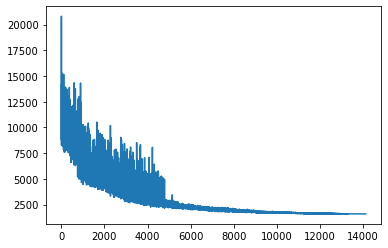

In [23]:
import matplotlib.pyplot as plt

plt.plot(lh[1000:])

In [19]:
min(lh)

1594

In [20]:
len(lh)

15116

In [ ]:
# q-learning

In [ ]:
min(lh)

In [ ]:
len(lh)